In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
varE: str = "Rendimiento Kg/Ha"
df = pd.DataFrame({varE: ["1400-1500", "1500-1600", "1600-1700", "1700-1800", "1800-1900",
                  "1900-2000", "2000-2100", "2100-2200"], "f": [2, 7, 26, 64, 57, 33, 10, 1]})

df[ ["Li","Ls"]] = df[varE].str.split("-",expand=True).astype("int")
df["Pm"] = (df["Ls"] + df["Li"]) / 2
df["F"] = df["f"].cumsum()
df["A"] = (df["Ls"] - df["Li"]) 
print(df)

  Rendimiento Kg/Ha   f    Li    Ls      Pm    F    A
0         1400-1500   2  1400  1500  1450.0    2  100
1         1500-1600   7  1500  1600  1550.0    9  100
2         1600-1700  26  1600  1700  1650.0   35  100
3         1700-1800  64  1700  1800  1750.0   99  100
4         1800-1900  57  1800  1900  1850.0  156  100
5         1900-2000  33  1900  2000  1950.0  189  100
6         2000-2100  10  2000  2100  2050.0  199  100
7         2100-2200   1  2100  2200  2150.0  200  100


In [24]:
promedio = (df["f"] * df["Pm"]).sum() / df["f"].sum()
varianza = (df["f"] * (df["Pm"] - promedio)**2).sum() / (df["f"].sum() - 1)
desviacion = varianza ** 0.5

print(f"El promedio es {promedio}")
print(f"El coeficiente de variacion es {round((desviacion / promedio) * 100,4)}%")

El promedio es 1805.5
El coeficiente de variacion es 6.8613%


In [25]:
def calcularPercentil(valor, df):
  percentil_decimal = valor / 100
  total_frecuencias = df['f'].sum()
  intervalo_percentil = df[df['F'] >=
                           total_frecuencias * percentil_decimal].iloc[0]
  ancho_intervalo = intervalo_percentil["Ls"] - intervalo_percentil["Li"]

  percentil = intervalo_percentil["Li"] + (percentil_decimal * total_frecuencias - intervalo_percentil["F"]
                                           + intervalo_percentil['f']) / intervalo_percentil["f"] * ancho_intervalo

  return percentil


def calcularInverso(valor, df: pd.DataFrame):
    # Buscar el intervalo
    ia = None
    ie = None
    for index, row in df.iterrows():
        if row['Li'] <= valor <= row['Ls']:
            ie = row
            if index != 0:
              ia = df.loc[index-1]['F']
            elif index == 0:
                ia = 0
            break
    final = (valor - ie['Li']) / \
        (ie['Ls'] - ie['Li'])
    final = final * ie['f']
    final = final + ia
    final = final * 100
    final = final / df['F'].max()
    return final

In [26]:
print(f"El porcentaje de establecimiento que ha superado los 2000 kg/ha es {100-calcularInverso(2000,df)}%")

print(f"El rendimiento garantizado es de {round(calcularPercentil(10,df),4)} kg/ha")



El porcentaje de establecimiento que ha superado los 2000 kg/ha es 5.5%
El rendimiento garantizado es de 1642.3077 kg/ha


In [27]:
anterior = df.loc[df['f'].idxmax()-1]
actual = df.loc[df['f'].idxmax()]
siguiente = df.loc[df['f'].idxmax()+1]

ancho_intervalo = actual["Ls"] - actual["Li"]

moda = actual["Li"] + ancho_intervalo * (actual["f"] - anterior["f"]) / (
    (actual["f"] - anterior["f"]) + (actual["f"] - siguiente["f"]))

simetria = "Asimetria positiva" if promedio > moda else "Asimetria Negativa"

print(simetria)

Asimetria positiva


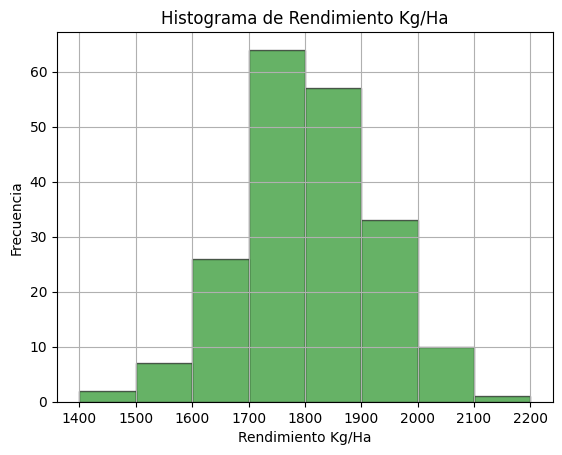

In [28]:
plt.bar(df["Pm"], df["f"], width=df["A"], align="center",
        alpha=0.6, color="g", edgecolor="k")
plt.title("Histograma de Rendimiento Kg/Ha")
plt.xlabel("Rendimiento Kg/Ha")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()